<a href="https://colab.research.google.com/github/yeneua/HG-MLDL/blob/main/8_2_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1)/255.0 # 입력 이미지는 깊이(채널) 차원 있어야함. 2차원 배열에 채널차원을 추가해줌
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# 합성곱 신경망 만들기

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
# 32개의 필터
# 커널 사이즈(3,3) -> 커널 사이즈에 깊이를 따로 지정X. 자동으로 입렵ㄱ 데이터 깊이에 동일하게 구성됨. 이경우는 input_shape=(28,28,1)이니까 커널 사이즈는 (3,3,1)

In [4]:
# 풀링층 추가
model.add(keras.layers.MaxPooling2D(2))

In [5]:
# 두번째 합성곱-풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
   # 64개의 필터
   # (3,3,32)차원의 필터 <- 첫번째 합성곱 층에서 32개의 필터를 사용해서 32차원이됨. 첫번째 풀링층에서는 차원변경X
model.add(keras.layers.MaxPooling2D(2))

In [6]:
# 일렬로 펼치기 -> 밀집은닉층 -> 드롭아웃 -> 출력층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [8]:
# 커널 사이즈에 깊이(채널)차원 = 입력데이터의 깊이

# conv2d : 필터크기 (3,3,1)
# 3*3*1*32+32 = 320

# conv2d_1 : 필터크기(3,3,32)
# 3*3*32*64+64 = 18496

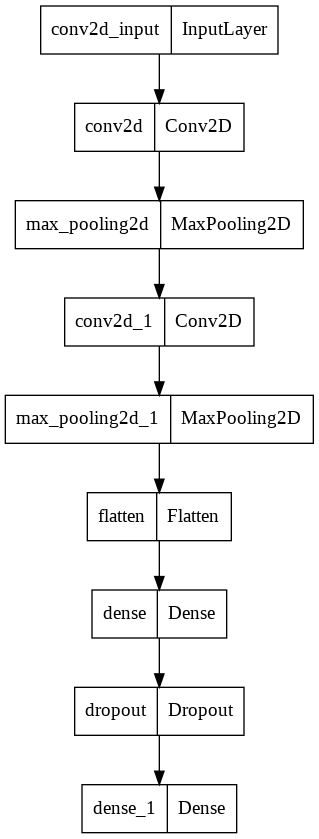

In [9]:
keras.utils.plot_model(model)

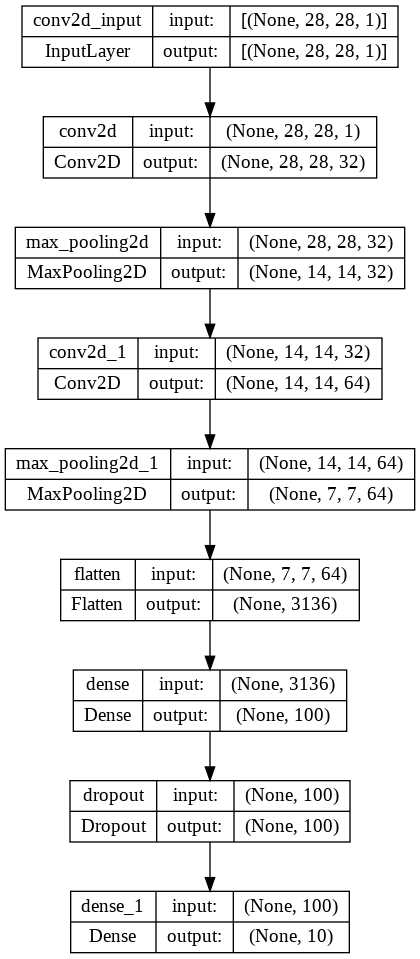

In [10]:
# 입력과 출력의 크기를 표시해줌
keras.utils.plot_model(model, show_shapes=True)

In [11]:
# 모델 컴파일과 훈련

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 15s 4ms/step - loss: 0.5120 - accuracy: 0.8169 - val_loss: 0.3294 - val_accuracy: 0.8788
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3394 - accuracy: 0.8787 - val_loss: 0.2811 - val_accuracy: 0.8965
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2914 - accuracy: 0.8948 - val_loss: 0.2691 - val_accuracy: 0.9024
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2609 - accuracy: 0.9058 - val_loss: 0.2390 - val_accuracy: 0.9141
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2353 - accuracy: 0.9135 - val_loss: 0.2393 - val_accuracy: 0.9117
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2167 - accuracy: 0.9196 - val_loss: 0.2238 - val_accuracy: 0.9197
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1988 - accuracy: 0.9265 - val_loss: 0.2192 - val_accuracy

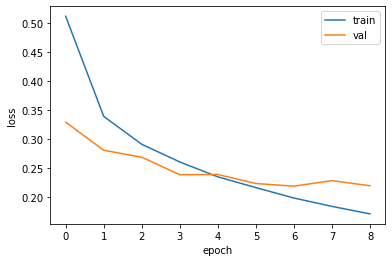

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [14]:
# 검증세트 점수
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2192 - accuracy: 0.9218


[0.21921071410179138, 0.921750009059906]

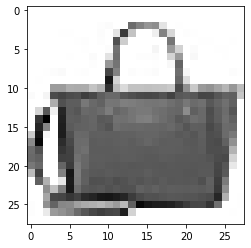

In [17]:
# 첫번째 이미지 출력해서 확인해보기 -> 가방
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')

In [27]:
preds=model.predict(val_scaled[0:1])
print(preds)
# -> 아홉번째 클래스라고 예측

1/1 [==============================] - 0s 26ms/step
[[7.0503140e-14 3.4634776e-19 1.2745964e-16 5.5317988e-17 7.4792326e-16
  9.9032443e-14 1.4600016e-14 1.4521357e-15 1.0000000e+00 2.6477456e-16]]


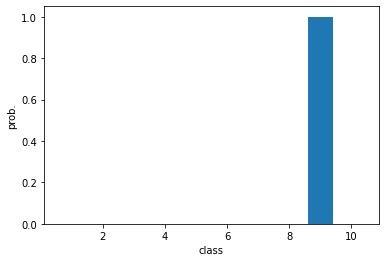

In [20]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [21]:
classes = ['티셔츠', '바지',' 스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [25]:
import numpy as np
print(np.argmax(preds))
print(classes[np.argmax(preds)])

8
가방


In [26]:
# 테스트세트 점수
test_scaled=test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2416 - accuracy: 0.9158


[0.24162636697292328, 0.9157999753952026]